# 비지도학습

## 군집 (Clustering)

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 꽃잎의 너비와 길이에 대한 산점도

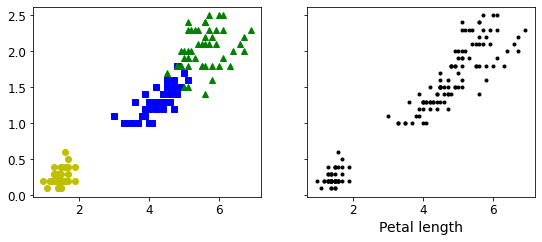

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris virginica')

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel('Petal length', fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

## K-Means Clustering

In [6]:
# make_blobs()를 이용한 데이터 생성
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#군집이 3개 피쳐가 2개 200개 샘플 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [7]:
# y target 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [9]:
target_list = np.unique(y)
target_list

array([0, 1, 2])

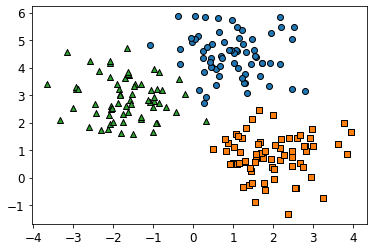

In [10]:
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

#3개의 cluster 영역으로 구부한 데이터셋을 생성했으므로 target_list는 [0,1,2], target=0, target=1, target=2로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])

## 5개 군집 데이터셋 생성

In [11]:
#5개의 중심점 좌표 생성
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

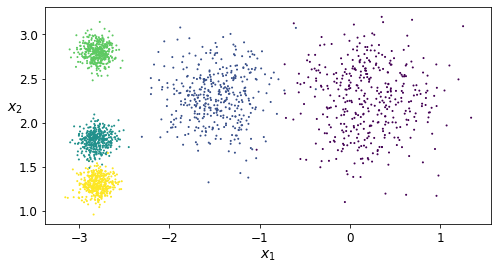

In [12]:
plt.figure(figsize=(8, 4))

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

## KMeans 사용해보기

In [13]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [14]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

### K-Means 결과를 가지고 있는 인스턴스들

In [15]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [16]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

### 새로운 샘플에대한 가까운 센트로이드의 클러스터 할당

In [17]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

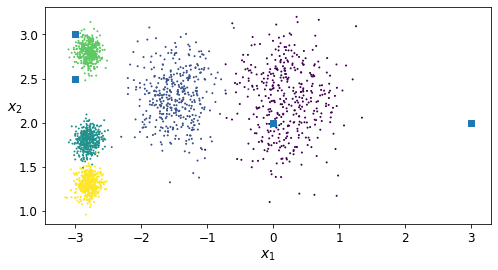

In [18]:
plt.figure(figsize=(8, 4))

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='s')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.show()

# iris 활용해 kmeans

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data=iris.data, 
                      columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
#KMeans 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [21]:
#군집화 결과 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [22]:
#실제 분류값 target과 군집화 분류값 labels 비교
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


## pca로 차원 축소된 북꽃 데이터의 k-means 군집화

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


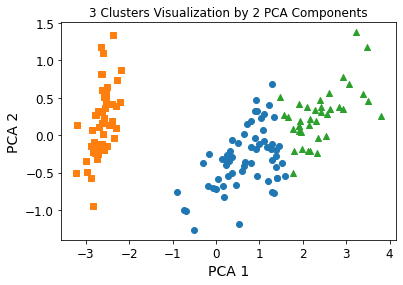

In [24]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## K-평균 장점과 단점
- **장점**
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    
    
- **단점**
    - 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
        - PCA와 같은 차원축소를 적용할 수 있음
    - 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 클러스터(군집)를 선택해야 할지 가이드하기 어려움

## 센트로이드 초기화
- 센트로이드 초기화에 따라 알고리즘 수렴의 최적화를 보장하지 못할 수 있다


[운 나쁜 센트로이드 초기화 때문에 최적이 아닌 솔루션 사례]
![image.png](attachment:image.png)

### 센트로이드 초기화 방법
: 센트로이드 위치를 근사하게 알 수 있다면 최적의 솔루션을 반환할 수 있다.

**방법1.** 다른 군집 알고리즘을 먼저 실행하여 근사한 센트로이드 위치를 결정
- `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, `n_init`를 1로 설정

In [25]:
good_init = np.array([[-3, 3,],[-3, 2],[-3,1],[-1,2],[0,2]])
kmeans_iter1 = KMeans(n_clusters=5, init=good_init, n_init=1)

**방법2.** 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택
- 랜덤 초기화 횟수 지정
    - KMeans( ) 메서드에서 매개변수 `n_init`로 조절
    - n_init 기본값은 10

**K-평균 알고리즘을 1, 2, 3회 반복하고 센트로이드가 어떻게 움직이는지 확인**

In [26]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

## K-평균의 최적 솔루션 성능 지표
- 이너셔(inertia) : 각 샘플과 가까운 센트로이드 사이의 평균 제곱 거리


- 이너셔가 가장 작은 모델이 최적
- KMeans 클래스의 `inertia_` 인스턴스 변수에 이너셔값을 저장

In [27]:
kmeans.inertia_

78.851441426146

In [28]:
kmeans_iter1.inertia_

482.1581517499828

In [29]:
kmeans_iter2.inertia_

373.0241779061537

In [30]:
kmeans_iter3.inertia_

279.34586670514074

- 앞의 5개 샘플 덩어리를 갖는 예에서 군집 알고리즘을 반복할수록 이너셔가 작아지며, 최적의 군집을 도출함을 알 수 있음

**score() 메서드** : 이너셔의 음수값을 반환
- 사이킷런은 큰 값이 좋은 값이라는 규칙에 따라 이너셔의 음수값을 반환

In [31]:
kmeans_iter3.score(X)

-279.34586670514074

## K-means++ 알고리즘
- 데이비드 아서(David Arthur) & 세르게이 바실비츠키(Sergei Vassilvitskii) 2006년 제안
- 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 제시
- 최적의 솔루션을 찾기 위한 실행 알고리즘의 반복 횟수를 크게 줄일 수 있으므로
- 초기화 단계에 드는 시간이 충분한 가치가 있는 알고리즘

**K-means++ 초기화 알고리즘**
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$를 선택한다.
2. $ \frac{D(x^{(i)})^2 } { \sum_{j=1}^m D(x^{(j)})^2 }$  의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드  $c^{(i)}$ 로 선택한다.
    - $ D(x^{(i)})^2 $  : 샘플 $x^{(i)}$와 이미 선택과 가장 가까운 센트로이드와의 거리
    - 이 확률분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임
3. $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복한다

- KMeans 클래스는 `K-means ++ 초기화 알고리즘을 사용`함
- 이 방식을 사용하고 싶지 않은 경우 `init` 매개변수를 `'random'`으로 지정

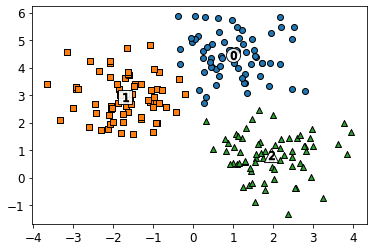

In [32]:
# 군집이 3개, 피처가 2개 200개 샘플 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

# KMeans++ 클러스터링 수행

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [33]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## K-평균 속도 개선과 미니배치 k-평균

**KMeans 알고리즘의 속도 개선**
- 2013년 찰스 엘칸(Charles Elkan) 제안
- 삼각부등식을 사용하여 불필요한 거리 계산을 줄임
- 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지
- 사이킷런의 KMeans 클래스에서 이 속도 개선 알고리즘 적용
    - `algorithm` 매개변수를 `'full'`로 지정

**미니배치를 사용한 K평균**
- 2010년 데이비드 스컬리(David Sculley) 제안
- 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동
- 알고리즘 속도를 3배에서 4배 정도 높임
- 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음
- 사이킷런의 `MiniBatchKMeans` 클래스

In [34]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

C:\Users\Amps\anaconda3\envs\multi\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


MiniBatchKMeans(n_clusters=5)

In [35]:
minibatch_kmeans.inertia_

184.91297838265095

- 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘 보다 훨씬 빠르지만, 이너셔는 일반적으로 조금 더 나쁨



## 최적의 클러스터 개수 찾기

### 방법1. 이너셔가 작아지는 모델 선택

- 이너셔는 k가 증가함에 따라 점점 작아지므로 k선택할 때 좋은 성능 지표가 아님

In [36]:
### 앞의 예제와 동일 (다시 사용)

# make_blobs 을 통해 clustering 을 위한 
# 5개의 클러스터 중심의 2000개 2차원 데이터 셋 생성 


from sklearn.datasets import make_blobs
import numpy as np

# 5개 중심점 좌표 설정

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# make_blobs 을 통해 
# 지정한 중심을 갖는 5개 클러스터로 된 데이터셋 2000개 생성

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [37]:
# k를 1~10까지 적용한 KMeans 모델 생성
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


# **k=1~10인 KMeans 모델별 이너셔에 대한 그래프 작성**

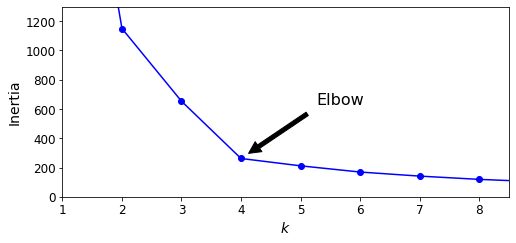

In [38]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# - 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 되어 이너셔는 더 작아짐

# - 엘보(elbow) : 클러스터 개수 k가 커질 때 이너셔가 꺽이는 지점

### 방법2. 실루엣 점수(silhouette score)
: 모든 샘플에 대한 실루엣 계수의 평균

실루엣계수 $ = \frac {(b-a)}{max(a,b)}$
- a : 동일한 클러스터에 있는 다른 샘플까지 평균 거리
    - 클러스터 내부의 평균 거리
- b : 가장 가까운 클러스터까지 평균 거리
    - 가장 가까운 클러스터의 샘플까지 평균거리
    - 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터
    

실루엣계수 : -1 ~ +1
- +1 에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있음을 나타냄
- 0에 가까우면 클러스터 경계에 위치함을 나타냄
- -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었음을 의미함

### 실루엣계수 계산 : silhouette_score() 함수

silhouette_score(샘플, 할당된레이블)

In [40]:
# 앞의 make_blobs()로 생성한 5개 클러스터를 갖는 예제에 적용
# 실루엣 점수 계산
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 200]

### 클러스터 개수에 따른 실루엣 점수 비교

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


# - k=4가 좋은 선택이지만 k=5도 꽤 좋음을 보여줌
# - k=6이나 7보다 훨씬 좋음
# - 이너셔를 비교했을때 드러나지 않은 것임

### 실루엣 다이어그램
- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계수값으로 정렬하여 그린 그래프
- 클러스터마다 칼 모양의 그래프가 그려짐
- 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수
- 그래프의 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄
    - 너비가 넓을수록 좋음

# ########### 참고. 실루엣 다이어그램 그리는 함수 ############
### 여러개의 클러스터링 갯수를 List로 입력 받아 
### 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

In [42]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 
    # 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 
        # 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n'                           
                           'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,                                 
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

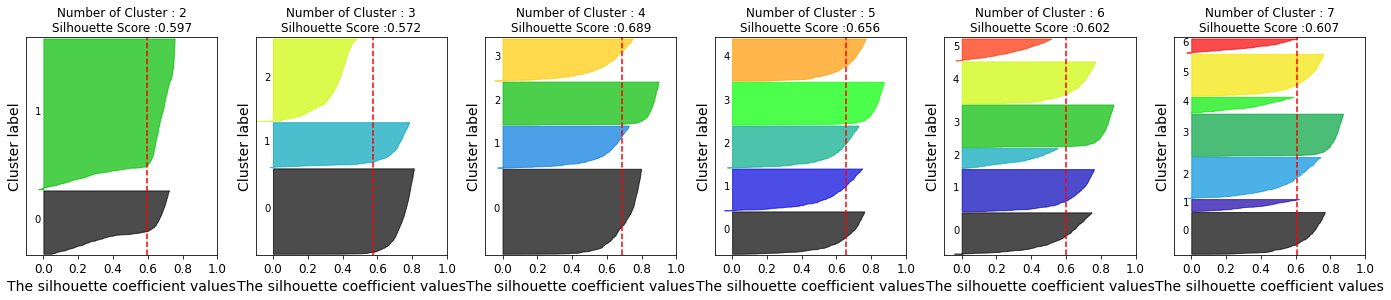

In [43]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5, 6, 7], X)

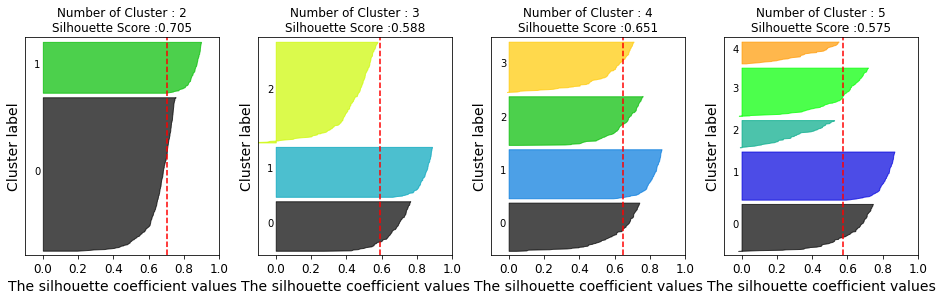

In [44]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 
# 500개 2차원 데이터 셋 생성  

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,                   
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

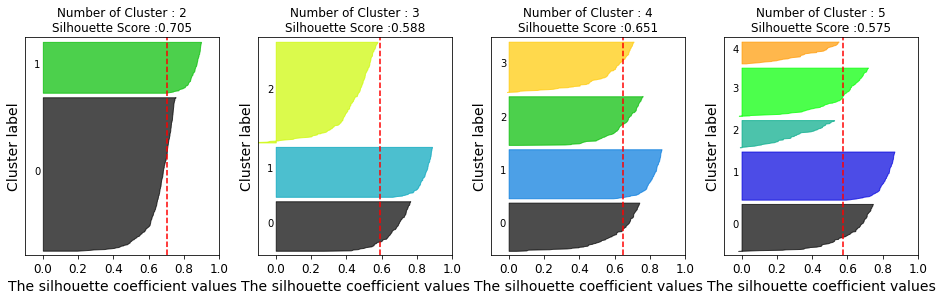

In [45]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 
# 500개 2차원 데이터 셋 생성  

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,                   center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

### iris dataset에 대한 KMeans 적용한 경우 실루엣 다이어그램

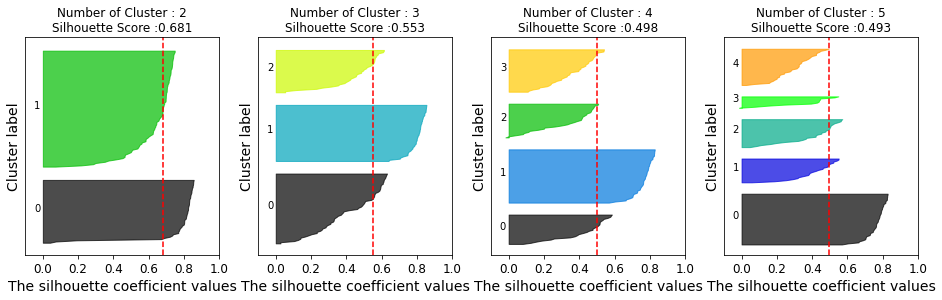

In [46]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5], iris.data)